<Body>   
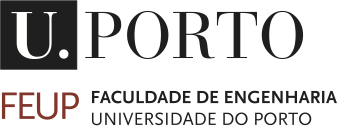   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.

---


In [ ]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] WARNING | pattern 'name_of_the_file.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

# **Identification**

- **Group:** Group B
- **Name:** Bernardo de Almeida Soeiro
- **Student Number:** up202008204

- **Name:** José Pedro Machado Leite Arteaga
- **Student Number:** up202004450

- **Name:** Rodrigo de Vasconcelos e Miguel
- **Student Number:** up202008406

---


# An Autonomous Underwtare Vehicle (UAV) model in the vertical plan


<Body>   
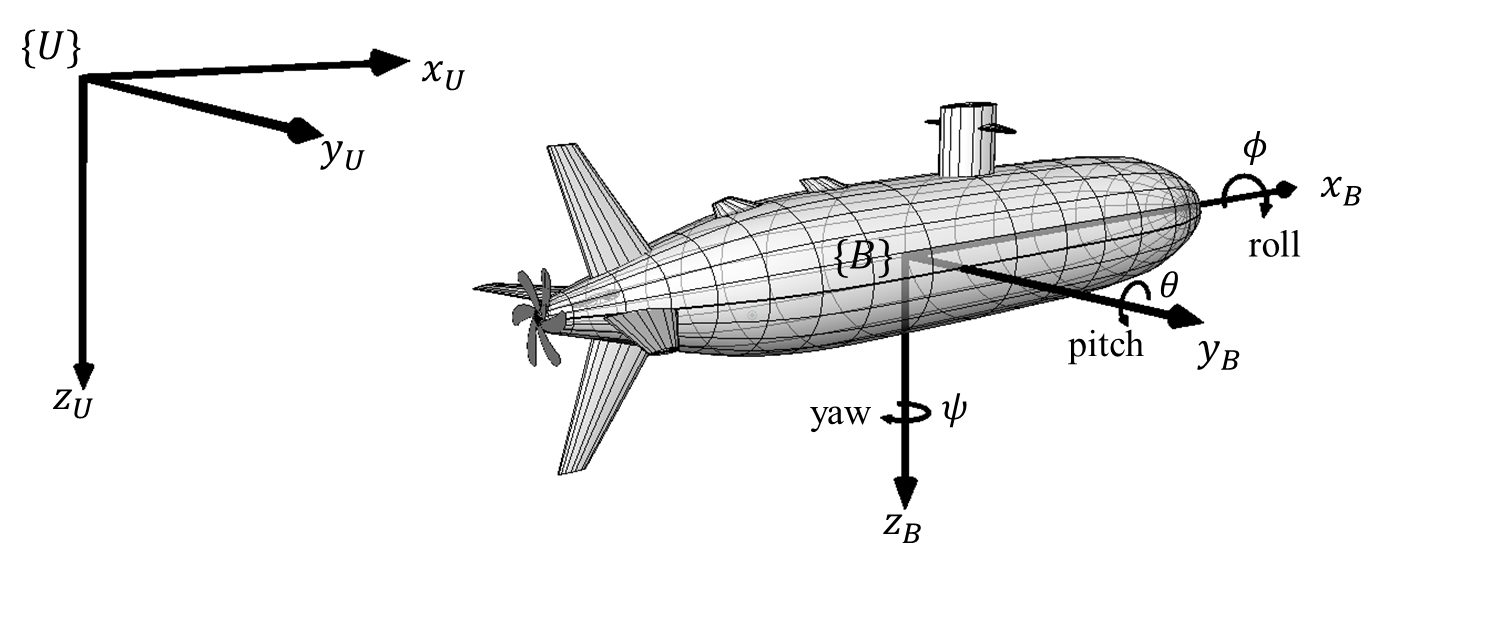

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
\dot x &= u\cos \theta + w\sin \theta \\
\dot z &= - u\sin \theta + w\cos \theta \\
\dot \theta &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.


The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m*u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m*{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d*u(u) &=-X_u-X*{u|u|}|u| \\
d*w(w) &=-Z_w-Z*{w|w|}|w| \\
d*q(q) &=-M_q-M*{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and torque around the $y$-axis of the vehicle, respectively.


# **Part 1: Stability analysis**


We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.


**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (_heave_), $\theta$ is the angle of _pitch_, and $q$ is the angular velocity around the axis $y_B$.


**Demonstration:**

Considering:
\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }} \nonumber
\end{equation}

We can obtain from the kinematic equations on the vertical plane:

\begin{equation}
\dot x = u\cos \theta + w\sin \theta = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}\cos \theta + w\sin \theta = v_d \nonumber
\end{equation}

\begin{equation}
\dot z = - u\sin \theta + w\cos \theta = -\frac{{v_d - w\sin \theta }}{{\cos \theta }} \sin \theta + w\cos \theta = -v_d \tan \theta + w \frac{1}{\cos\theta} \left( \sin^2(\theta) + \cos^2(\theta) \right) = - v_d \tan\theta + \frac{1}{\cos\theta}w\nonumber
\end{equation}

\begin{equation}
\dot \theta = q \nonumber
\end{equation}

Then considering the heave dynamics equation and The hydrodynamic damping term $d_w(w)$:

$$
{m_w}\dot w - {m_u}uq + d_w(w)w = 0
$$

$$
d_w(w) =-Z_w-Z_{w|w|}|w|
$$

We can obtain:

$$
{m_w}\dot w - {m_u}\frac{{{v_d} - w\sin \theta }}{{\cos \theta }}q + \left(-Z_w w - Z_{w|w|}|w|w\right) = 0
$$

$$
\dot w = \frac{Z_w}{m_w} w + \frac{Z_{w|w|}}{m_w}|w|w + \frac{m_u}{m_w}\frac{{{v_d} - w\sin \theta }}{{\cos \theta }}q
$$

That is equivalent to :

$$
\dot w =d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
$$

When assuming :

$$
d_1 =  \frac{Z_w}{m_w} \\
$$

$$
d_2 = \frac{Z_{w|w|}}{m_w} \\
$$

$$
\bar m = \frac{m_u}{m_w} \\
$$


In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$


**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.


**1.2 Answer**

Considering the system in state-space form, we have the following equations:

$$
\dot{x} =
\begin{bmatrix}
\dot{z} - \dot{z_d}\\
\dot{w} \\
\dot{\theta}
\end{bmatrix}=
\begin{bmatrix}
 - v_d \tan\theta + \frac{1}{\cos\theta}w\nonumber\\
d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
q
\end{bmatrix}
=\begin{bmatrix}
f_1(x) \\
f_2(x) \\
f_3(x)
\end{bmatrix}
$$

Linearization

$$
\dot{x} = A x + B u
$$

$$
A = \begin{bmatrix}
\frac{\partial f_1}{\partial (z-z_d)} & \frac{\partial f_1}{\partial w} & \frac{\partial f_1}{\partial \theta} \\
\frac{\partial f_2}{\partial (z-z_d)} & \frac{\partial f_2}{\partial w} & \frac{\partial f_2}{\partial \theta} \\
\frac{\partial f_3}{\partial (z-z_d)} & \frac{\partial f_3}{\partial w} & \frac{\partial f_3}{\partial \theta} \\
\end{bmatrix}_{x=x_0, u=u_0}
= \begin{bmatrix}
0 & 1 &  -vd  \\
0 & d_1 & 0\\
0 & 0 & 0
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
\frac{\partial f_1}{\partial q} \\
\frac{\partial f_2}{\partial q} \\
\frac{\partial f_3}{\partial q}
\end{bmatrix}_{x=x_0, u=u_0} =
\begin{bmatrix}
0 \\ 1 \\ 1
\end{bmatrix}
$$

$$
C =
\begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix}
$$


**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.


In [ ]:
import numpy as np

A = np.array([[0, 1, -1],
              [0, -3, 0],
              [0, 0, 0] ])

print ('A matrix\n', A)

#Let's check the eigenvalues of A
eig_open_loop, eig_vect = np.linalg.eig( A )
print ('Eigenvalues of A \n', eig_open_loop)
#poles in the origin -> can't conclude about stability

A matrix
 [[ 0  1 -1]
 [ 0 -3  0]
 [ 0  0  0]]
Eigenvalues of A 
 [ 0. -3.  0.]


**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.


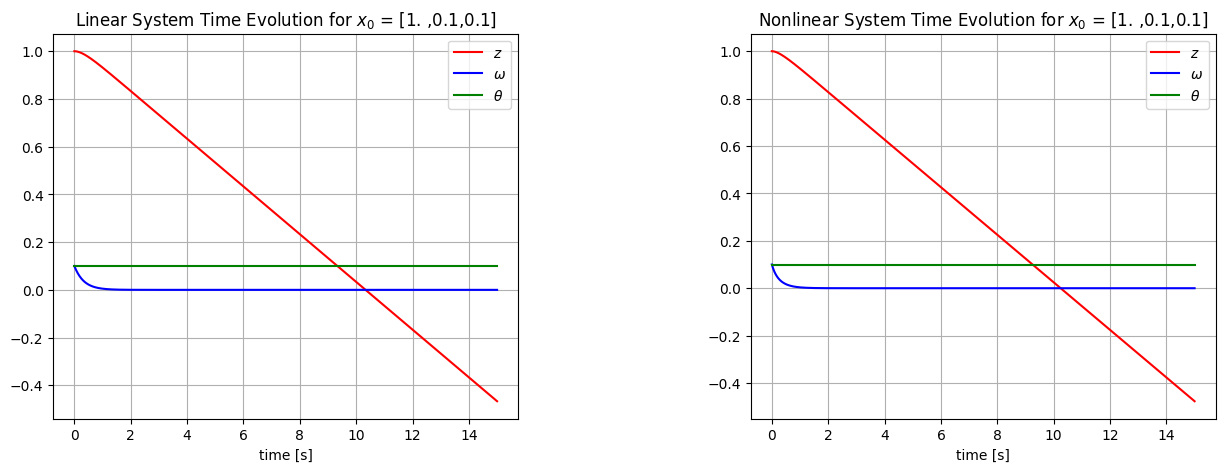

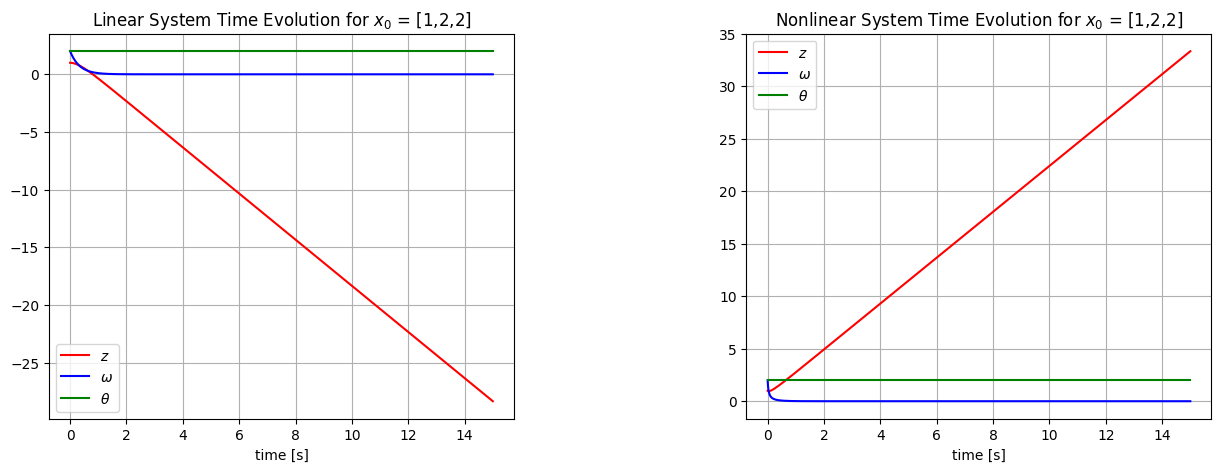

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#parameters
vd = 1
d1 = -3
d2 = -12
m_ = 0.9
q = 0

A = np.array([[0, 1, -1],
              [0, -3, 0],
              [0, 0, 0] ])

# vector field
def Sys_linear_f(x, t=0):
  return A @ x

def Sys_nonlin_f(x, t=0):
    return np.array([
        -vd*np.tan(x[2]) + (1/np.cos(x[2]))*x[1],
        d1*x[1] + d2*x[1]*np.abs(x[1]) + m_*(vd/np.cos(x[2]) - x[1]*np.tan(x[2]))*q,
        q
    ])

# generate 1000 linearly spaced points for t
t_end=15
t = np.linspace(0, t_end,  1000)

# initial values, close to the equilibrium point:
x0_close = np.array([1, 0.1, 0.1])
#initial values, far from the equilibrium point:
x0_far = np.array([1, 2, 2])

x_l_close, infodict = integrate.odeint(Sys_linear_f, x0_close, t, full_output=True)
x_nl_close, infodict = integrate.odeint(Sys_nonlin_f, x0_close, t, full_output=True)
x_l_far, infodict = integrate.odeint(Sys_linear_f, x0_far, t, full_output=True)
x_nl_far, infodict = integrate.odeint(Sys_nonlin_f, x0_far, t, full_output=True)
# infodict['message']                      # integration successful

x_l_1_close,x_l_2_close, x_l_3_close = x_l_close.T
x_nl_1_close,x_nl_2_close, x_nl_3_close = x_nl_close.T

x_l_1_far,x_l_2_far, x_l_3_far = x_l_far.T
x_nl_1_far,x_nl_2_far, x_nl_3_far = x_nl_far.T

#plots for x0=x0_close
fig_close = plt.figure(figsize=(15,5))
fig_close.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig_close.add_subplot(1,2,1)
ax2 = fig_close.add_subplot(1,2,2)

ax1.plot(t, x_l_1_close, 'r-', label='$z$')
ax1.plot(t, x_l_2_close, 'b-', label='$\omega$')
ax1.plot(t, x_l_3_close, 'g-', label='$\\theta$')
ax1.set_title("Linear System Time Evolution for $x_0$ = " + np.array2string(x0_close, separator=','))
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t, x_nl_1_close, 'r-', label='$z$')
ax2.plot(t, x_nl_2_close, 'b-', label='$\omega$')
ax2.plot(t, x_nl_3_close, 'g-', label='$\\theta$')
ax2.set_title("Nonlinear System Time Evolution for $x_0$ = " + np.array2string(x0_close, separator=','))
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best');

#plots for x0=x0_close
fig_far = plt.figure(figsize=(15,5))
fig_far.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig_far.add_subplot(1,2,1)
ax2 = fig_far.add_subplot(1,2,2)

ax1.plot(t, x_l_1_far, 'r-', label='$z$')
ax1.plot(t, x_l_2_far, 'b-', label='$\omega$')
ax1.plot(t, x_l_3_far, 'g-', label='$\\theta$')
ax1.set_title("Linear System Time Evolution for $x_0$ = " + np.array2string(x0_far, separator=','))
ax1.set_xlabel("time [s]")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t, x_nl_1_far, 'r-', label='$z$')
ax2.plot(t, x_nl_2_far, 'b-', label='$\omega$')
ax2.plot(t, x_nl_3_far, 'g-', label='$\\theta$')
ax2.set_title("Nonlinear System Time Evolution for $x_0$ = " + np.array2string(x0_far, separator=','))
ax2.set_xlabel("time [s]")
ax2.grid()
ax2.legend(loc='best');





**Comment**: We can see that the linear system is not able to capture the dynamics of the nonlinear system and the equilibrium point is not stable, at least for the initial conditions considered.


**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. \\
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


**Demonstration**

**Subsystem:**

The subsystem is represented by:

$$
\begin{bmatrix}
\dot{\tilde z}\\
\dot{\theta}
\end{bmatrix}=
\begin{bmatrix}
 - v_d \tan\theta\\
k_1 \tilde z - k_2 \theta
\end{bmatrix}
$$

**Lyapunov function:**

The Lyapunov function is given by:
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi = \frac{k_1}{2 v_d}\tilde z^2 - \ln(|\cos(\phi)|)
\end{equation}

The Lyapunov function is positive definite:

\begin{equation*}
\forall (\tilde z, \theta) \in D =\{(\tilde z, \theta) \in \mathbb{R^2}: -\frac{\pi}{2} < \theta < \frac{\pi}{2}\}.
\end{equation*}

**Lyapunov Method:**

$$
\dot V(\tilde z, \theta) =  \frac{\partial V}{\partial \tilde z}\dot {\tilde z}+\frac{\partial V}{\partial \theta}\dot \theta
$$

$$
\dot V(\tilde z, \theta) = \frac{k_1}{v_d}  \tilde z \dot {\tilde z}+ \tan(\theta)\dot \theta
$$

$$
\dot{V}(\tilde{z}, \theta) = \frac{k_1}{v_d}\tilde{z}(-v_d \tan(\theta)) + \tan(\theta)({k_1 \tilde{z}}-{k_2 \theta})
$$

$$
\dot V(\tilde z, \theta) = - k_1\tilde z\tan(\theta)+k_1\tilde z\tan(\theta) +-k_2\theta\tan (\theta)
$$

$$
\dot V(\tilde z, \theta) =-k_2\theta\tan (\theta), \quad k2 > 0
$$

Since $\dot V$ is semi-definite we need to use the LaSalle's theorem:

Define a set:
\begin{equation}
E=\{(\tilde z, \theta) \in \mathbb{R^2}: \dot V(\tilde z, \theta) = 0\} = \{(\tilde z, \theta) \in \mathbb{R^2}: \theta = 0\}
\end{equation}

Find largest invariant set M, subset of E, by replacing in the subsystem's dynamics:

$$
\begin{aligned}
\dot{\tilde z} = -v_d\tan(0) = 0 \\
\dot{\theta} = k_1 \tilde z - k_2 * 0 = k_1 \tilde z
\end{aligned}
$$

$$
\textbf{But the set M $\subset$ E, therefore the only solution is M being the point (0,0), meaning $\dot{\theta}$ must also be 0.}\\
\textbf{In conclusion, by leveraging LaSalle's we can proove that $(\tilde z, \theta) \to M=(0,0)$ as $t \to \infty$. So the origin is asymptotically stable.}
$$


**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.


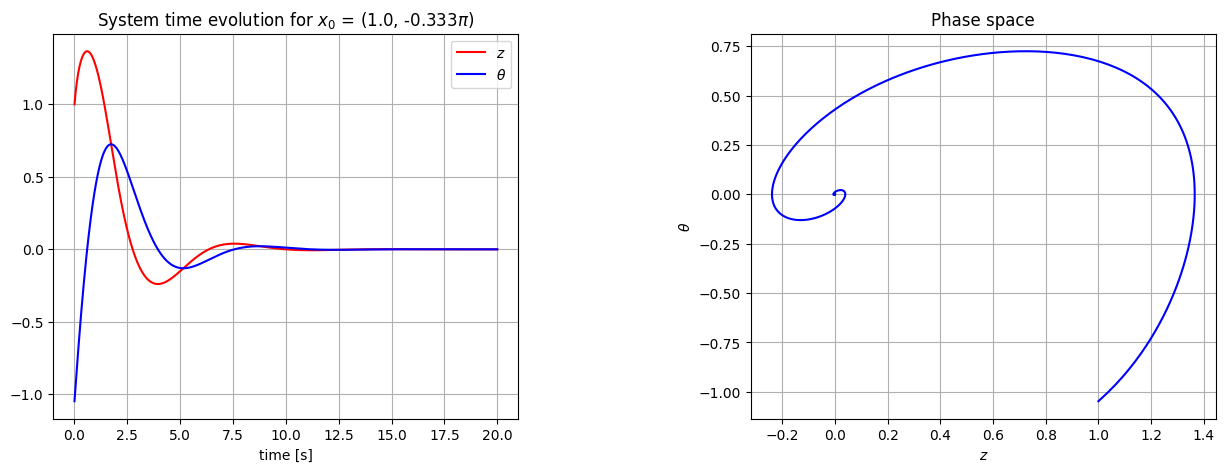

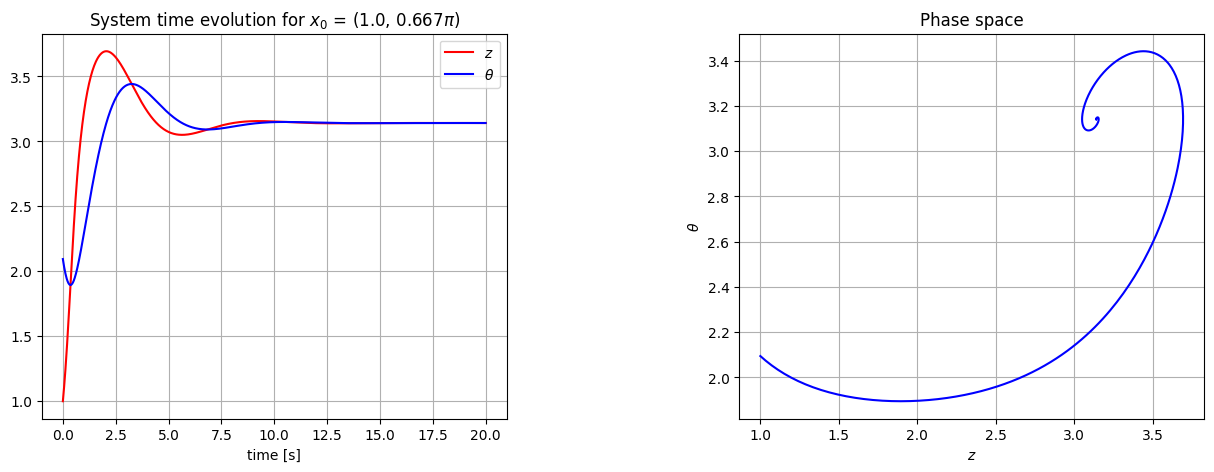

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
vd = 1
k1 = 1
k2 = 1

# vector field
def Sys_f(x, t=0):
    return np.array([
        -vd*np.tan(x[1]),
        k1*x[0]-k2*x[1]
    ])

# generate 1000 linearly spaced points for t
t_end=20
t = np.linspace(0, t_end,  1000)

# initial values:
x0_1 = np.array([1, -1/3*np.pi]) #should be stable
x0_2 = np.array([1, 2/3*np.pi]) #should be unstable (>pi/2), AUV on its back

x_1, infodict = integrate.odeint(Sys_f, x0_1, t, full_output=True)
x_2, infodict = integrate.odeint(Sys_f, x0_2, t, full_output=True)

x1_1,x2_1 = x_1.T
x1_2,x2_2 = x_2.T

#plot
def plot(x1, x2, x0) -> None:
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    ax1.plot(t, x1, 'r-', label='$z$')
    ax1.plot(t, x2, 'b-', label='$\\theta$')
    #set the title but normalize theta in function of pi (for better readability)
    ax1.set_title("System time evolution" + " for $x_0$ = (" + x0[0].astype(str) + ', ' + str(np.round(x0[1]/np.pi,3)) + '$\pi$' + ')')
    ax1.set_xlabel("time [s]")
    ax1.grid()
    ax1.legend(loc='best')

    ax2.plot(x1, x2, color="blue")
    ax2.set_xlabel("$z$")
    ax2.set_ylabel("$\\theta$")
    ax2.set_title("Phase space")
    ax2.grid()

plot(x1_1, x2_1, x0_1)
plot(x1_2, x2_2, x0_2);

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state for different initial conditions.


Final depth: 1.001356898327964
Final angle: -0.0004617488542385814
Final depth: 4.141744354396024
Final angle: 3.1394971570647328


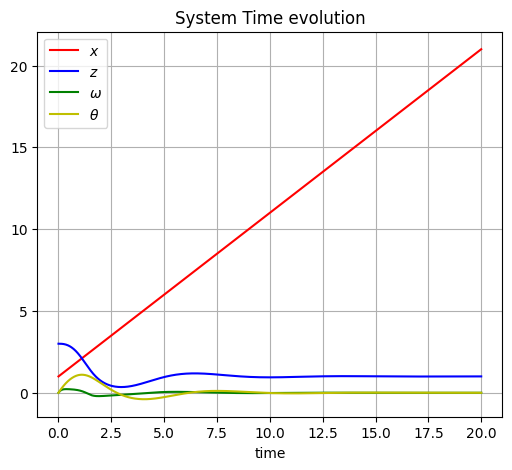

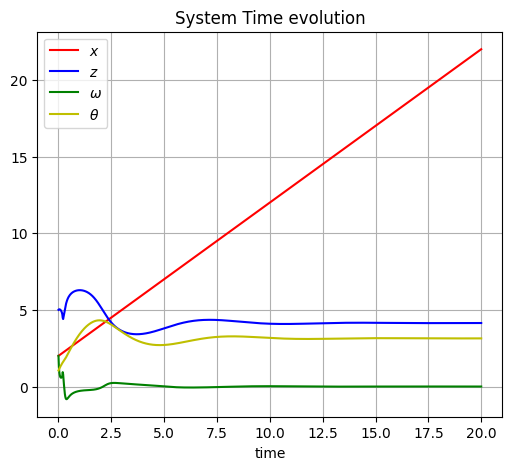

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# parameters
vd = 1
k1 = 1
k2 = 1
d1 = -3
d2 = -12
m_ = 0.9
zd = 1
# vector field
def Sys_f(x, t=0):
  z_til = x[1]-zd
  q= k1*z_til-k2*x[3]
  return np.array([vd,
                  -vd*np.tan(x[3]) + (1 / np.cos(x[3])) * x[2],
                  d1 * x[2] + d2 * x[2] * np.abs(x[2]) + m_*(vd/np.cos(x[3])-x[2]*np.tan(x[3]))* q,
                  q
                  ])

# generate 1000 linearly spaced points for t
t_end=20
t = np.linspace(0, t_end,  1000)

# initial values:
x0_1 = np.array([1, 3, 0, 0]) #initial deviation = 3
x0_2 = np.array([2, 5, 2, np.pi/3])

x_1, infodict = integrate.odeint(Sys_f, x0_1, t, full_output=True)
x_2, infodict = integrate.odeint(Sys_f, x0_2, t, full_output=True)

x1_1,x2_1, x3_1, x4_1 = x_1.T
x1_2,x2_2, x3_2, x4_2 = x_2.T

def plot_4(x1, x2, x3, x4) -> None:
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
    ax1 = fig.add_subplot(1,2,1)

    ax1.plot(t, x1, 'r-', label='$x$')
    ax1.plot(t, x2, 'b-', label='$z$')
    ax1.plot(t, x3, 'g-', label='$\\omega$')
    ax1.plot(t, x4, 'y-', label='$\\theta$')
    ax1.set_title("System Time evolution")
    ax1.set_xlabel("time")
    ax1.grid()
    ax1.legend(loc='best');
    print("Final depth:", x2[-1])
    print("Final angle:", x4[-1])

plot_4(x1_1, x2_1, x3_1, x4_1)
plot_4(x1_2, x2_2, x3_2, x4_2)


**Comment** We can see for the entire AUV system, from an initial deviation of >4m from the desired depth, there is error in the steady state, since the global ass. stability was not prooved, especially for the 4 state space variable system.


# **Part 2: Control Design**


**2.1**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, where $z_d$ is a constant desired depth.
Assuming $q$ as input and $w=0$, design a **Backstepping** Lyapunov based feedback law such that $z(t)$ converges to $z_d$ as $t\to\infty$ and the tracking error system at the origin is AS.

To this end, in the first step of the methodology assume that the **virtual control signal** is $\tan(\theta)$ (and not $\theta$).


**2.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $z(t)$, the tracking error $\tilde z(t)$, the pitch angle $\theta$ and the input signal $q$.


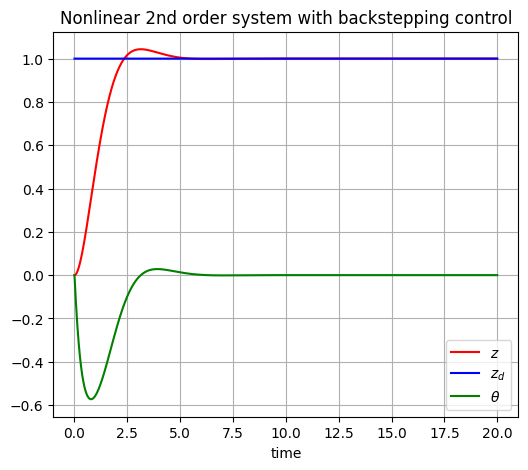

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

k1=1
k2=1
vd=1

def step_f(z,th,zd,dt):
  z_til = z-zd
  phi = k1*z_til #backstepping control function
  dotphi = -k1*vd*np.tan(th)
  z2 = np.tan(th)-phi
  q = np.cos(th)**2 * (dotphi - k2*z2 + vd*z_til)
  return ([ z+(-vd*np.tan(th))*dt, #Euler approximation
            th+ q*dt
                   ])

#Sample-time
dt = 0.001
t_end=20
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

z = np.zeros_like(t_signal)
th = np.zeros_like(t_signal)
zd_signal= t_signal*0 + 1 #constant value

#Initial conditions of our system
z[0] = 0
th[0] = 0

# Iteration
for i in range(0,t_signal.shape[0]-1):
    z[i+1],th[i+1] = step_f(z[i],th[i],zd_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)


ax1.plot(t_signal, z, 'r-', label='$z$')
ax1.plot(t_signal, zd_signal, 'b-', label='$z_d$')
ax1.plot(t_signal, th, 'g-', label='$\\theta$')
ax1.set_title("Nonlinear 2nd order system with backstepping control")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best');


**2.3**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the backstepping control law.
Plot the **time-evolution** of the state for different initial conditions.


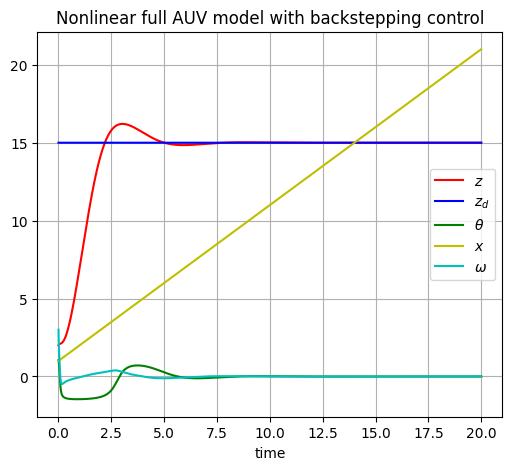

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

vd = 1
k1 = 1
k2 = 1
d1 = -3
d2 = -12
m_ = 0.9

def step_f(x,z,w,th,zd,dt):
  z_til = z-zd
  phi = k1*z_til
  dotphi = -k1*vd*np.tan(th)
  z2 = np.tan(th)-phi
  q = np.cos(th)**2 * (dotphi - k2*z2 + vd*z_til)
  return ([x + vd * dt, #Euler approximation
            z + (-vd * np.tan(th) + w/np.cos(th)) * dt,
            w + (d1 * w + d2 * w * np.abs(w) + m_ * q * (vd / np.cos(th) - w * np.tan(th))) * dt,
            th + q * dt])

#Sample-time
dt = 0.001
t_end=20
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x = np.zeros_like(t_signal)
z = np.zeros_like(t_signal)
w = np.zeros_like(t_signal)
th = np.zeros_like(t_signal)
zd_signal= t_signal*0 + 15 #constant value

#Initial conditions of our system
x[0] = 1
z[0] = 2
w[0] = 3
th[0] = np.pi/3

# Iteration
for i in range(0,t_signal.shape[0]-1):
    x[i+1],z[i+1],w[i+1],th[i+1] = step_f(x[i],z[i],w[i],th[i],zd_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)


ax1.plot(t_signal, z, 'r-', label='$z$')
ax1.plot(t_signal, zd_signal, 'b-', label='$z_d$')
ax1.plot(t_signal, th, 'g-', label='$\\theta$')
ax1.plot(t_signal, x, 'y-', label='$x$')
ax1.plot(t_signal, w, 'c-', label='$\\omega$')
ax1.set_title("Nonlinear full AUV model with backstepping control")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best');


**Comment**: Comparing with Part 1, non-linear control seems to work even for large depths.


**2.4**
For the same conditions stated in **2.1**, design a **sliding mode controller** and confirm the results through simulation.
For the sliding surface use

$$
s = \dot{\tilde z} + \lambda \tilde z, \quad \lambda>0
$$


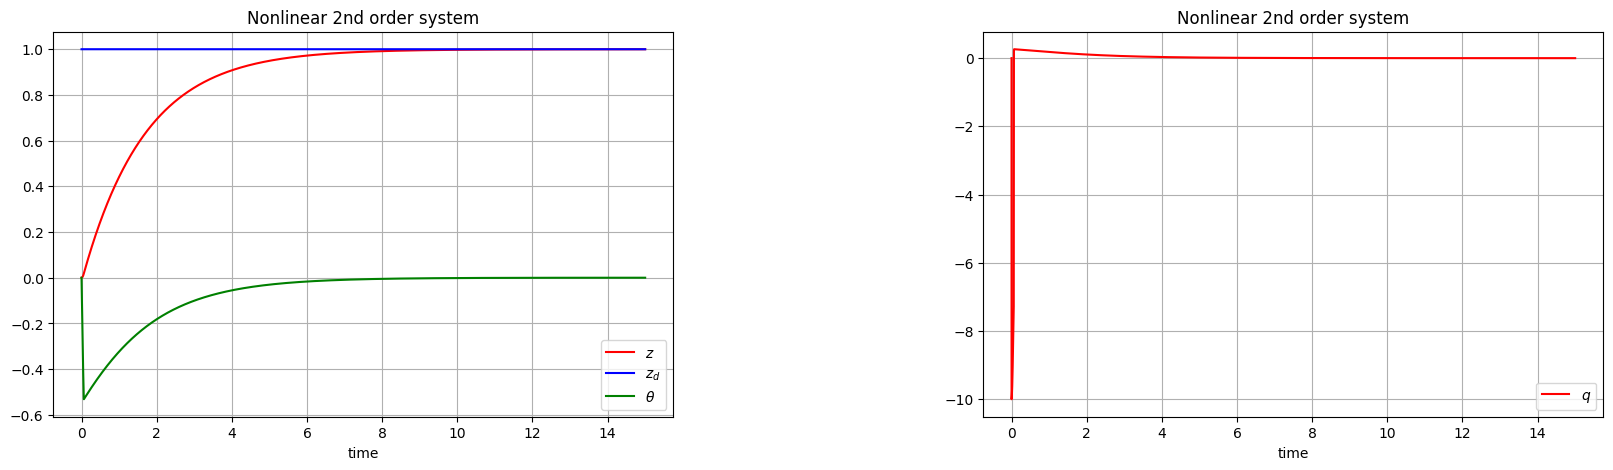

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def step_f(z, th ,zd,dt):
  lambda1 = 0.6 # defines the convergence rate
  epsilon = 0.015 #tradeoff between shattering and final error
  vd=1
  K=10
  tilde_z = z-zd;
  dottilde_z = -vd*np.tan(th)
  s = dottilde_z + lambda1*tilde_z
  if abs(s) < epsilon: #saturation function
    v = -K*s/epsilon
  else:
    v = -K*np.sign(s)
  q = -np.cos(th)**2*lambda1*np.tan(th) -v*np.cos(th)**2/vd #control law
  return ([ z+(-vd*np.tan(th))*dt,
            th+ q*dt,
            q
                   ])


#Sample-time
dt = 0.001
t_end=15
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

w=1
z = np.zeros_like(t_signal)
th = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
zd_signal= t_signal*0 + 1

#Initial conditions of our system
z[0] = 0

# Iteration
for i in range(0,t_signal.shape[0]-1):
    z[i+1],th[i+1], u_signal[i+1] = step_f(z[i],th[i],zd_signal[i],dt)

#plot
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


ax1.plot(t_signal, z, 'r-', label='$z$')
ax1.plot(t_signal, zd_signal, 'b-', label='$z_d$')
ax1.plot(t_signal, th, 'g-', label='$\\theta$')
ax1.set_title("Nonlinear 2nd order system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal, u_signal, 'r-', label='$q$')
ax2.set_title("Nonlinear 2nd order system")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best');


**2.5 (Extra)**
For the linearized system in **1.2**, design a **LQR controller** and confirm the results through simulation.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).


In [ ]:
!pip install control

Defaulting to user installation because normal site-packages is not writeable


LQR Gain K: [[-0.2236068  -0.06718732  0.7764996 ]]


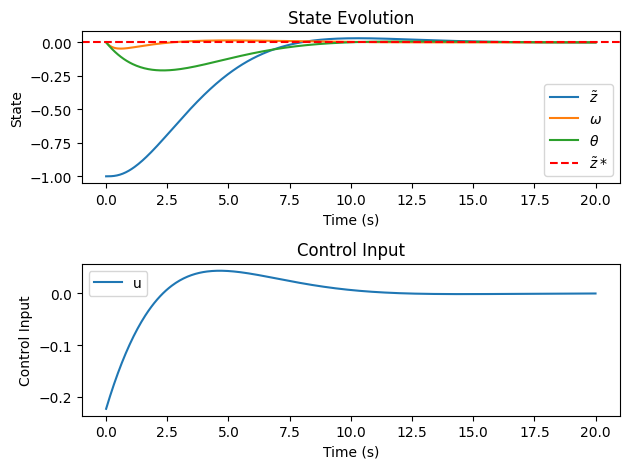

In [ ]:
import numpy as np
import scipy as sp
from scipy import integrate
import control as ct
import matplotlib.pyplot as plt

A = np.array([[0, 1, -1],
              [0, -3, 0],
              [0, 0, 0]])

B = np.array([[0],
              [1],
              [1]])

# Initial conditions for the linear system
x0 = np.array([-1., 0., 0.])
u0 = np.array([1., 0.])

xf = np.array([0., 0., 0.])  # target

Q = np.diag([1, 1, 1])  # state costs, weight on state error
R = np.array([[20]])    # input cost, weight on control effort -> actuation cost

# Solve LQR
K, P, E = ct.lqr(A, B, Q, R)
print("LQR Gain K:", K)

def sys_cl_update(t, x):
    u = -K @ x
    return A @ x + B @ u

# Now simulate from a shifted initial condition
Tf = 20
xsol = sp.integrate.solve_ivp(sys_cl_update, (0, Tf), x0, t_eval=np.linspace(0, Tf, 500))
t1 = xsol.t
y1 = xsol.y
u1 = -K @ y1

# Plot
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t1, y1[0, :], label='$\\tilde{z}$')
plt.plot(t1, y1[1, :], label='$\\omega$')
plt.plot(t1, y1[2, :], label='$\\theta$')
plt.axhline(y=xf[0], color='r', linestyle='--', label='$\\tilde{z}*$')
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.legend()
plt.title('State Evolution')

plt.subplot(2, 1, 2)
plt.plot(t1, u1[0, :], label='u')
plt.xlabel('Time (s)')
plt.ylabel('Control Input')
plt.legend()
plt.title('Control Input')

plt.tight_layout()
plt.show()